In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [10, 7.5]

## Dataset 

In [6]:
data_folder = 'data'
data = pd.read_csv(os.path.join(data_folder,'shampoo.csv'))

In [7]:
data

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [8]:
data.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [9]:
data.head(10)

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


### Dataset summary 

In [10]:
data.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [11]:
data.mean()

Sales    312.6
dtype: float64

In [12]:
data.std()

Sales    148.937164
dtype: float64

## Visualizations 
### Histograms

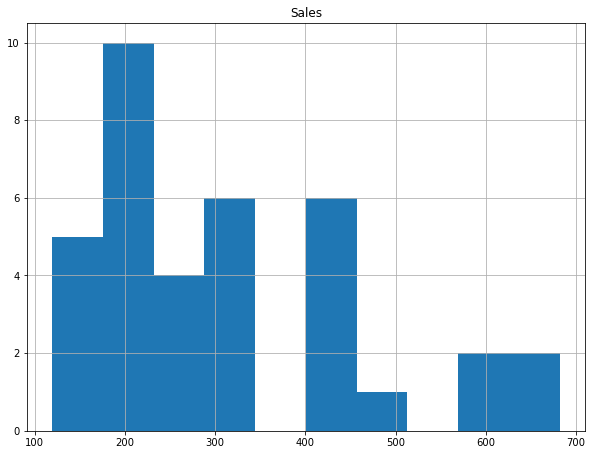

In [14]:
data.hist();

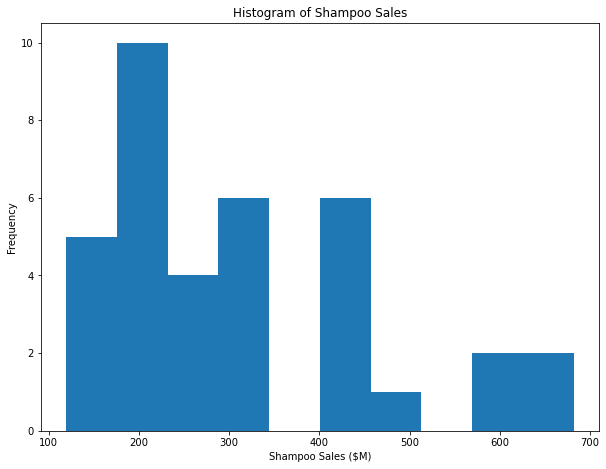

In [15]:
plt.hist(data['Sales'])
plt.title('Histogram of Shampoo Sales');
plt.xlabel('Shampoo Sales ($M)');
plt.ylabel('Frequency');

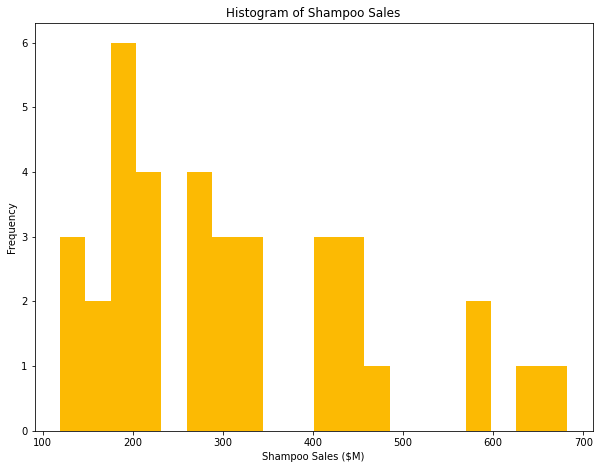

In [16]:
plt.hist(data['Sales'], bins=20, color='#fcba03')
plt.title('Histogram of Shampoo Sales');
plt.xlabel('Shampoo Sales ($M)');
plt.ylabel('Frequency');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


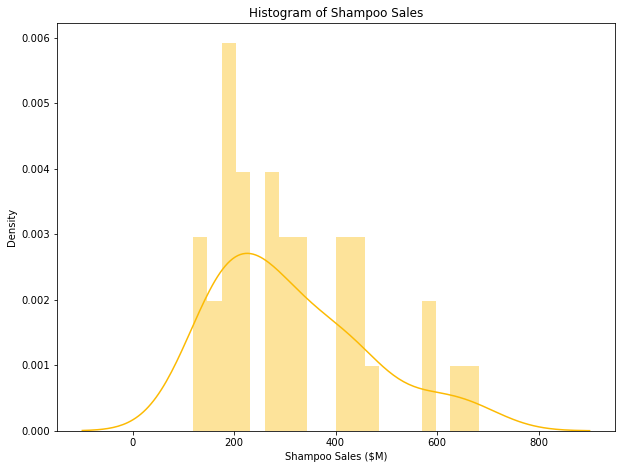

In [23]:
sns.distplot(data['Sales'], bins=20, hist=True, kde=True, color='#fcba03');
# sns.displot(data=data, x='Sales', kde=True, bins = 20, color='#fcba03')
plt.title('Histogram of Shampoo Sales');
plt.xlabel('Shampoo Sales ($M)');
plt.ylabel('Density');

### Scatter plots 

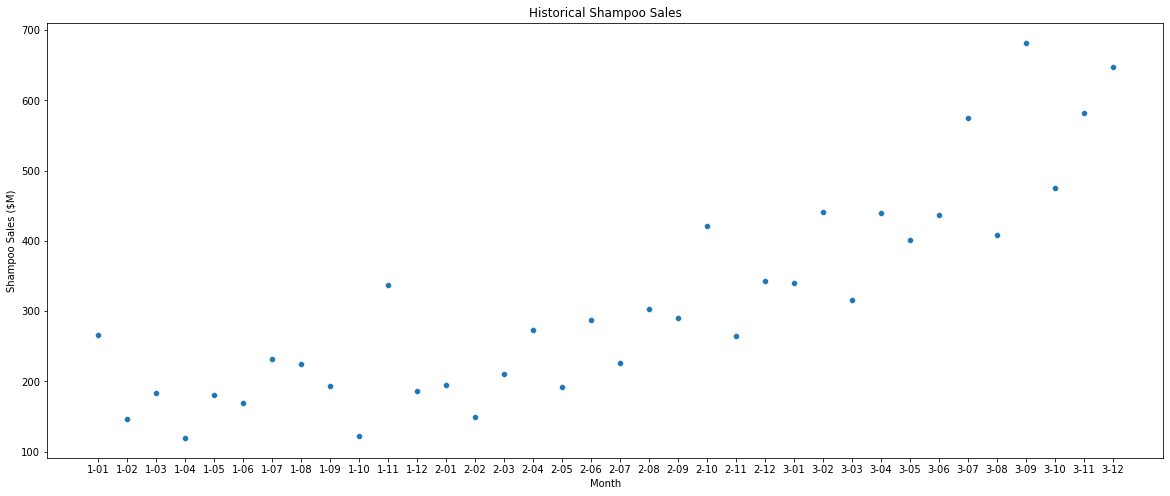

In [25]:
plt.figure(figsize=(20, 8))

# sns.scatterplot(x=data['Month'], y=data['Sales']);
sns.scatterplot(data = data, x='Month', y='Sales');
plt.title('Historical Shampoo Sales');
plt.ylabel('Shampoo Sales ($M)');
plt.xlabel('Month');

## Inferential Statistics 

In [31]:
# Dataset from here: https://www.co2.earth/historical-co2-datasets
co2_data = pd.read_csv(os.path.join(data_folder,'co2_dataset.csv'))

co2_data.head(5)

,year,data_mean_global,data_mean_nh,data_mean_sh
0,0,277.454,277.454,277.454
1,1,277.137,277.137,277.137
2,2,277.160,277.160,277.160
3,3,277.158,277.158,277.158
4,4,277.157,277.157,277.157


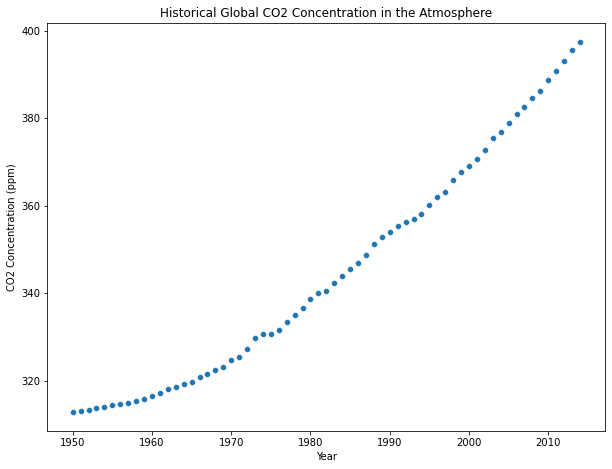

In [42]:
# Let's only consider the data from the year 1950

lv_co2 = co2_data.loc[:,'year']>=1950
X = co2_data.loc[lv_co2,'year'].to_numpy()
y = co2_data.loc[lv_co2,'data_mean_global'].to_numpy()

sns.scatterplot(x=X, y=y);
plt.title('Historical Global CO2 Concentration in the Atmosphere');
plt.ylabel('CO2 Concentration (ppm)');
plt.xlabel('Year');

In [44]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

reg = LinearRegression()

reg.fit(X, y)

print(f"The slope is {reg.coef_[0][0]} and the intercept is {reg.intercept_[0]}")

The slope is 1.358871192943465 and the intercept is -2348.0338300545372


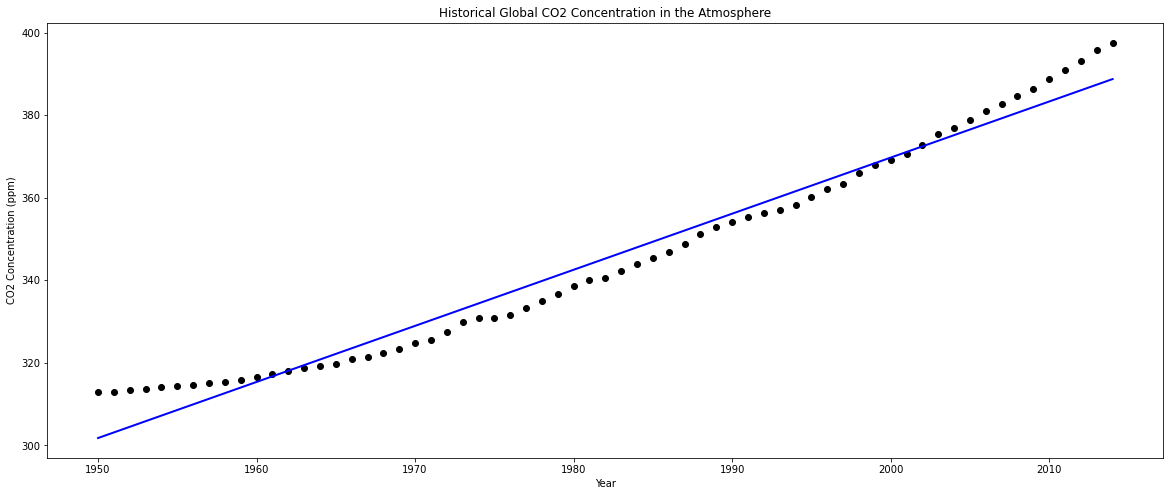

In [45]:
# X = co2_data['year'].values[1950:]
# y = co2_data['data_mean_global'].values[1950:]

predictions = reg.predict(X)

plt.figure(figsize=(20, 8))
plt.scatter(X, y,c='black')
plt.plot(X, predictions, c='blue', linewidth=2)
plt.title('Historical Global CO2 Concentration in the Atmosphere');
plt.ylabel('CO2 Concentration (ppm)');
plt.xlabel('Year');
plt.show()

In [47]:
X_sm = sm.add_constant(X)# co2_data['year'].values[1950:])
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     2073.
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           6.40e-50
Time:                        15:06:10   Log-Likelihood:                -189.19
No. Observations:                  65   AIC:                             382.4
Df Residuals:                      63   BIC:                             386.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2348.0338     59.161    -39.689      0.0

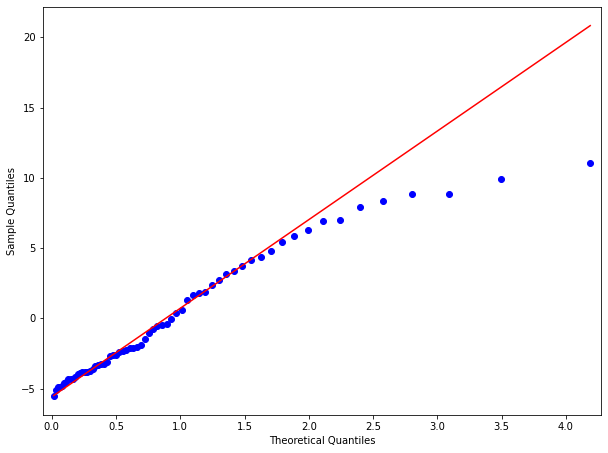

In [54]:
from scipy.stats.distributions import expon as expon_dist

residuals = model.resid
qq_plot = sm.qqplot(residuals, line='q', dist=expon_dist)

plt.show()

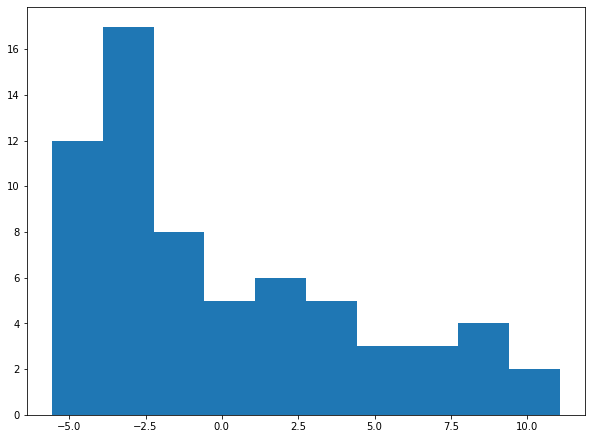

In [55]:
plt.hist(residuals);